In [34]:
import act
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib.colors as colors
import pandas as pd
import matplotlib.dates as mdates

In [35]:
# Set your username and token here!
username = 'sanielson'
token = '467abc05f4c61fde'

# Set the datastream and start/enddates
datastream_sebs = 'bnfsebsS30.b1'
startdate = '2025-02-07'
enddate = '2025-04-30T23:59:59'

# Use ACT to easily download the data.  Watch for the data citation!  Show some support
# for ARM's instrument experts and cite their data if you use it in a publication
result_sebs = act.discovery.download_arm_data(username, token, datastream_sebs, startdate, enddate)

datastream_ecor = 'bnfecorsfS30.b1'
result_ecor = act.discovery.download_arm_data(username, token, datastream_ecor, startdate, enddate)

datastream_sirs = 'bnfsirsS30.b1'
result_sirs = act.discovery.download_arm_data(username, token, datastream_sirs, startdate, enddate)

[DOWNLOADING] bnfsebsS30.b1.20250226.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250214.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250314.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250212.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250423.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250408.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250328.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250227.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250302.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250219.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250313.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250304.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250416.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250404.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250406.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250323.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250213.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250320.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250421.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250218.000000.cdf
[DOWNLOADING] bnfsebsS30.b1.20250311.000

In [36]:
# Let's read in the data using ACT and check out the data
ds_sebs = act.io.read_arm_netcdf(result_sebs)
ds_sebs

<xarray.Dataset> Size: 1MB
Dimensions:                        (time: 3984, bound: 2)
Coordinates:
  * time                           (time) datetime64[ns] 32kB 2025-02-07 ... ...
Dimensions without coordinates: bound
Data variables: (12/70)
    base_time                      (time) datetime64[ns] 32kB 2025-02-07 ... ...
    time_offset                    (time) datetime64[ns] 32kB 2025-02-07 ... ...
    time_bounds                    (time, bound) object 64kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    down_short_hemisp              (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_down_short_hemisp           (time) int32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    up_short_hemisp                (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                             ...
    qc_temp_net_radiometer         (time) int32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    battery_voltage                (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    qc_battery_voltage             (time) int32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                            (time) float32 16kB 34.38 34.38 ... 34.38
    lon                            (time) float32 16kB -86.93 -86.93 ... -86.93
    alt                            (time) float32 16kB 183.0 183.0 ... 183.0
Attributes: (12/33)
    command_line:            sebs_ingest -s bnf -f S30
    Conventions:             ARM-1.3
    process_version:         ingest-sebs-1.9-0.el7
    dod_version:             sebs-b1-1.6
    input_source:            /data/collection/bnf/bnfsebsS30.00/SEBS_Table30....
    site_id:                 bnf
    ...                      ...
    qc_bit_3_assessment:     Bad
    history:                 created by user dsmgr on machine prod-proc3.adc....
    _file_dates:             ['20250207', '20250208', '20250209', '20250210',...
    _file_times:             ['000000', '000000', '000000', '000000', '000000...
    _datastream:             bnfsebsS30.b1
    _arm_standards_flag:     1

In [37]:
#ECOR has sensible and latent heat flux together
ds_ecor = act.io.read_arm_netcdf(result_ecor)
ds_ecor

<xarray.Dataset> Size: 3MB
Dimensions:                                 (time: 3979, bound: 2)
Coordinates:
  * time                                    (time) datetime64[ns] 32kB 2025-0...
Dimensions without coordinates: bound
Data variables: (12/146)
    base_time                               (time) datetime64[ns] 32kB 2025-0...
    time_offset                             (time) datetime64[ns] 32kB 2025-0...
    time_bounds                             (time, bound) object 64kB dask.array<chunksize=(48, 2), meta=np.ndarray>
    day_of_year                             (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    file_records                            (time) float64 32kB dask.array<chunksize=(48,), meta=np.ndarray>
    used_records                            (time) float64 32kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                                      ...
    covariance_w_h2o_cov                    (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    covariance_w_ch4_cov                    (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_signal_strength_7500_mean           (time) float32 16kB dask.array<chunksize=(48,), meta=np.ndarray>
    lat                                     (time) float32 16kB 34.38 ... 34.38
    lon                                     (time) float32 16kB -86.93 ... -8...
    alt                                     (time) float32 16kB 183.0 ... 183.0
Attributes: (12/17)
    command_line:          ecorsf_ingest -s bnf -f S30
    Conventions:           ARM-1.3
    process_version:       ingest-ecorsf-1.3-0.el7
    dod_version:           ecorsf-b1-1.5
    input_source:          /data/collection/bnf/bnfecorsfS30.00/2025-02-06T23...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1494128
    history:               created by user dsmgr on machine prod-proc2.adc.ar...
    _file_dates:           ['20250207', '20250208', '20250209', '20250210', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfecorsfS30.b1
    _arm_standards_flag:   1

In [38]:
# Let's read in the data using ACT and check out the data
ds_sirs = act.io.read_arm_netcdf(result_sirs)
ds_sirs

<xarray.Dataset> Size: 48MB
Dimensions:                                       (time: 119460, bound: 2)
Coordinates:
  * time                                          (time) datetime64[ns] 956kB ...
Dimensions without coordinates: bound
Data variables: (12/93)
    base_time                                     (time) datetime64[ns] 956kB ...
    time_offset                                   (time) datetime64[ns] 956kB ...
    time_bounds                                   (time, bound) object 2MB dask.array<chunksize=(1440, 2), meta=np.ndarray>
    up_long_hemisp                                (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_up_long_hemisp                             (time) int32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp1                             (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    ...                                            ...
    qc_down_short_hemisp_vent_tachometer          (time) int32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp1_netir                       (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    down_long_hemisp2_netir                       (time) float32 478kB dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                                           (time) float32 478kB 34.38 ...
    lon                                           (time) float32 478kB -86.93...
    alt                                           (time) float32 478kB 183.0 ...
Attributes: (12/23)
    command_line:          mergerad2sirs -s bnf -f S30
    Conventions:           ARM-1.3
    process_version:       ingest-mergerad2sirs-1.0-0.el7
    dod_version:           sirs-b1-8.0
    input_datastreams:     bnfgndrad1sS30.a0 : 1.2 : 20250206.000000-20250207...
    site_id:               bnf
    ...                    ...
    doi:                   10.5439/1475460
    history:               created by user dsmgr on machine prod-proc4.adc.ar...
    _file_dates:           ['20250207', '20250208', '20250209', '20250210', '...
    _file_times:           ['000000', '000000', '000000', '000000', '000000',...
    _datastream:           bnfsirsS30.b1
    _arm_standards_flag:   1

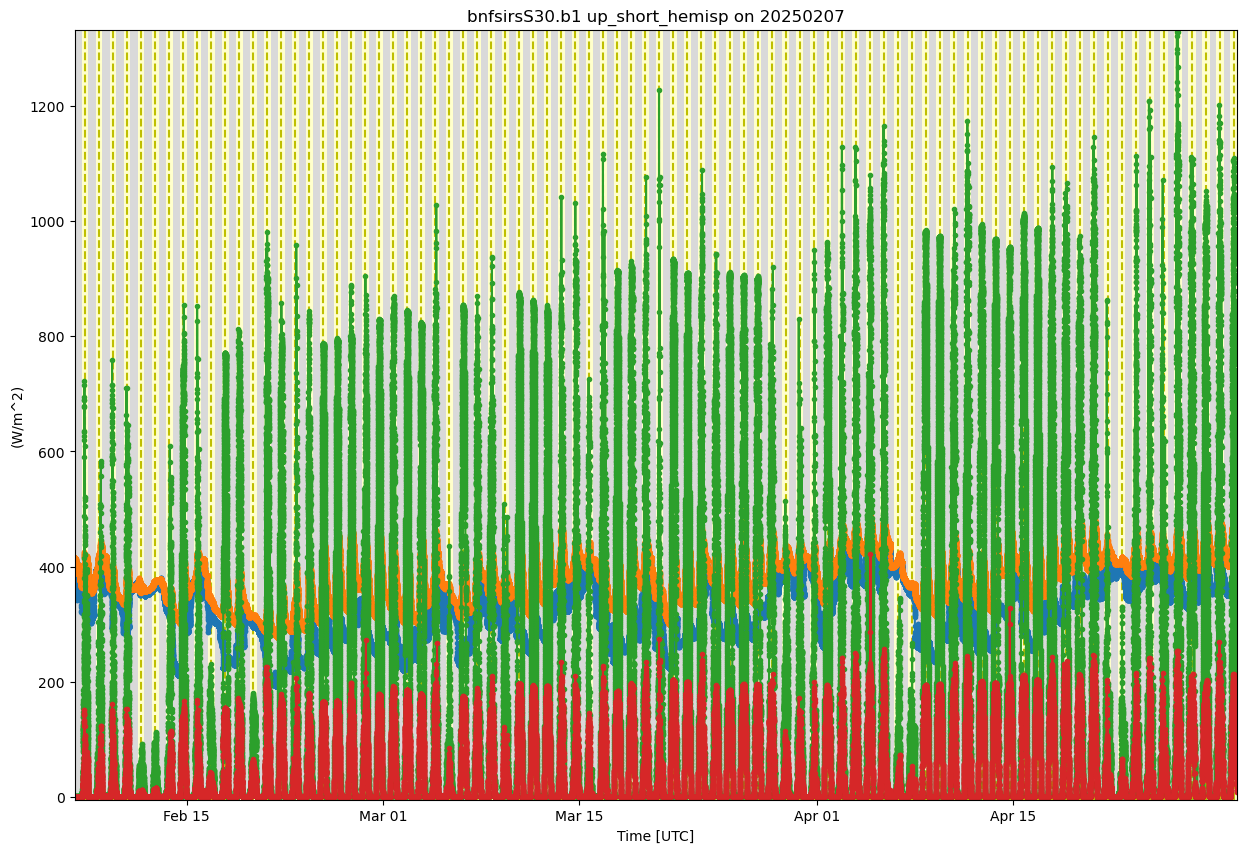

In [39]:
ds_sirs.clean.cleanup()

down_long = 'down_long_hemisp1'
up_long = 'up_long_hemisp'
down_short = 'down_short_hemisp'
up_short = 'up_short_hemisp'

display = act.plotting.TimeSeriesDisplay(ds_sirs, figsize=(15, 10))

# Plot up the variable in the plots
display.plot(down_long, subplot_index=(0,))
display.plot(up_long, subplot_index=(0,))
display.plot(down_short, subplot_index=(0,))
display.plot(up_short, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up a day/night background
#display.day_night_background(subplot_index=(0,))
plt.show()

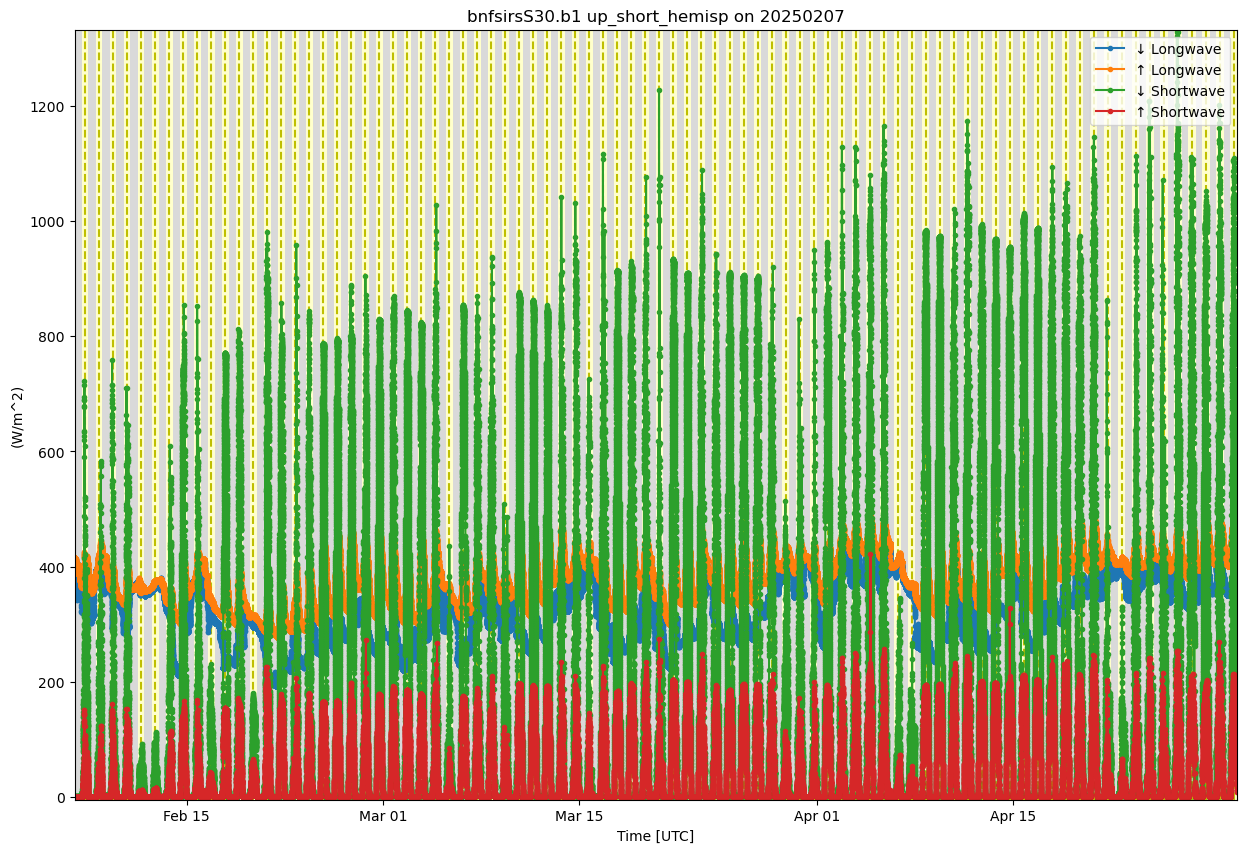

In [40]:
display = act.plotting.TimeSeriesDisplay(ds_sirs, figsize=(15, 10))

# Plot each variable with a label
display.plot(down_long, subplot_index=(0,), label='↓ Longwave')
display.plot(up_long, subplot_index=(0,), label='↑ Longwave')
display.plot(down_short, subplot_index=(0,), label='↓ Shortwave')
display.plot(up_short, subplot_index=(0,), label='↑ Shortwave')

# Add day/night background
display.day_night_background(subplot_index=(0,))

# Show legend manually
display.axes[0].legend(loc='upper right')

plt.show()


In [41]:
net_radiation = (ds_sirs['down_long_hemisp1'] - ds_sirs['up_long_hemisp']) + (ds_sirs['down_short_hemisp'] - ds_sirs['up_short_hemisp'])

Text(0, 0.5, 'Radiation')

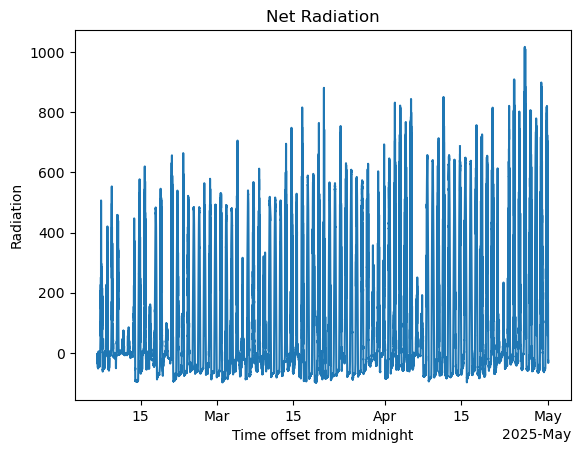

In [42]:
#net radiation calculations
net_radiation.plot()
plt.title('Net Radiation')
plt.ylabel('Radiation')

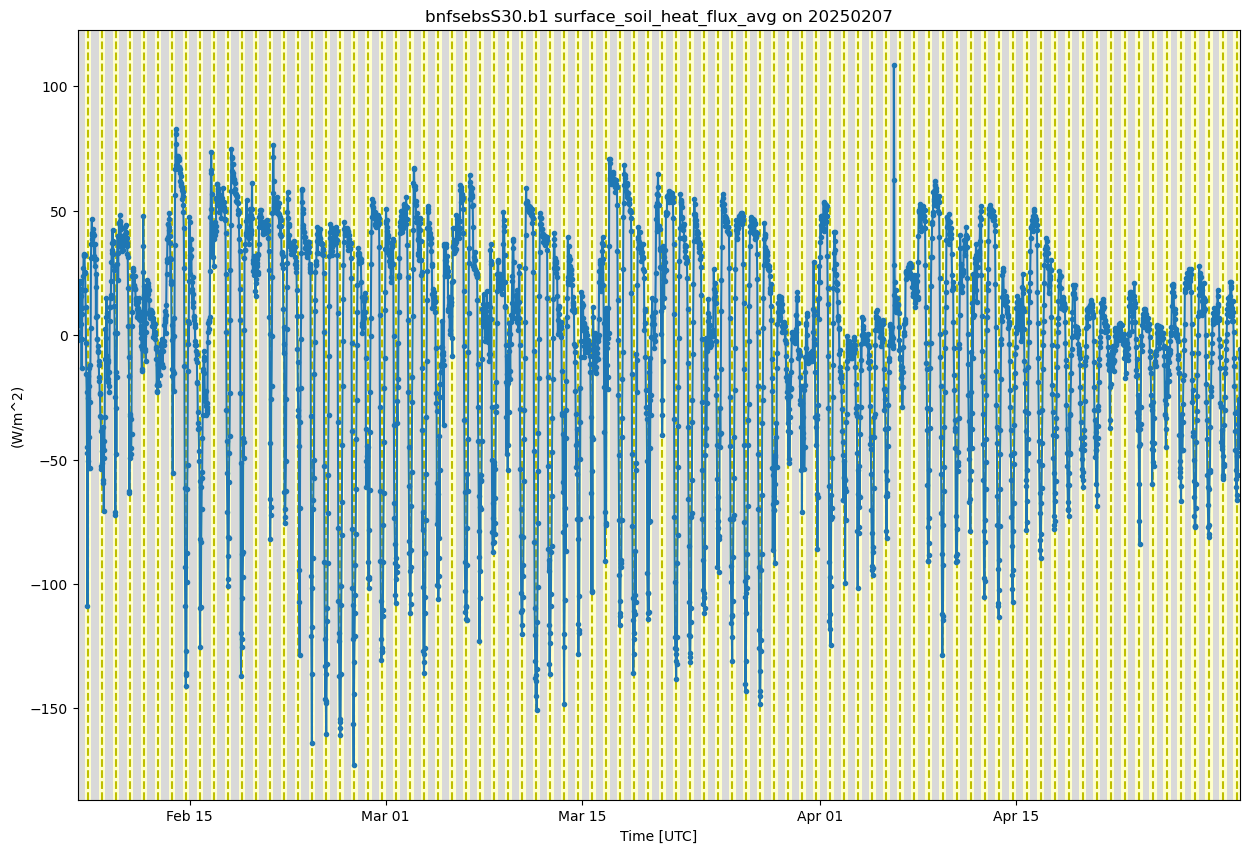

In [43]:
ds_sebs.clean.cleanup()

soil_flux = 'surface_soil_heat_flux_avg'

display = act.plotting.TimeSeriesDisplay(ds_sebs, figsize=(15, 10))

# Plot up the variable in the plots
display.plot(soil_flux, subplot_index=(0,))

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

plt.show()

In [44]:
avail_e = net_radiation - ds_sebs['surface_soil_heat_flux_avg']

Text(0, 0.5, 'Radiation')

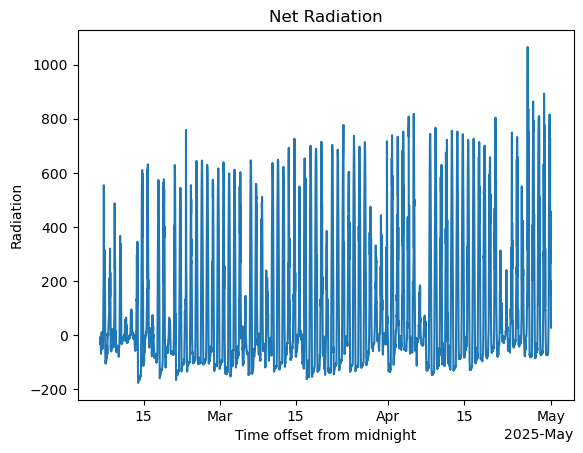

In [45]:
#net radiation calculations
avail_e.plot()
plt.title('Net Radiation')
plt.ylabel('Radiation')

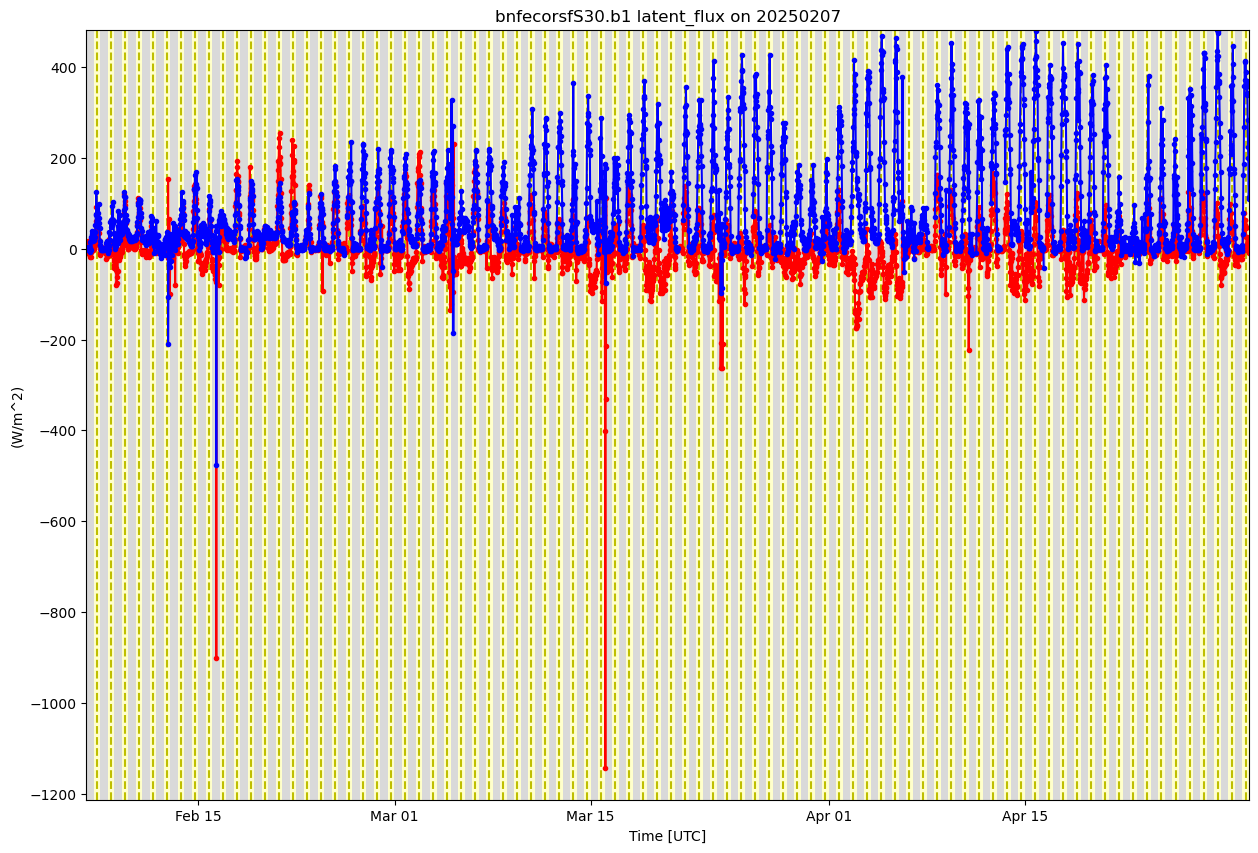

In [47]:
ds_ecor.clean.cleanup()

sensible_flux = 'sensible_heat_flux'
latent_flux = 'latent_flux'

display = act.plotting.TimeSeriesDisplay(ds_ecor, figsize=(15, 10))

# Plot up the variable in the plots
display.plot(sensible_flux, subplot_index=(0,), color='red')
display.plot(latent_flux, subplot_index=(0,), color='blue')

# Plot up a day/night background
display.day_night_background(subplot_index=(0,))

# Plot up a day/night background
#display.day_night_background(subplot_index=(0,))
plt.show()

In [48]:
turb_flux = ds_ecor['sensible_heat_flux'] + ds_ecor['latent_flux']

Text(0, 0.5, 'Radiation')

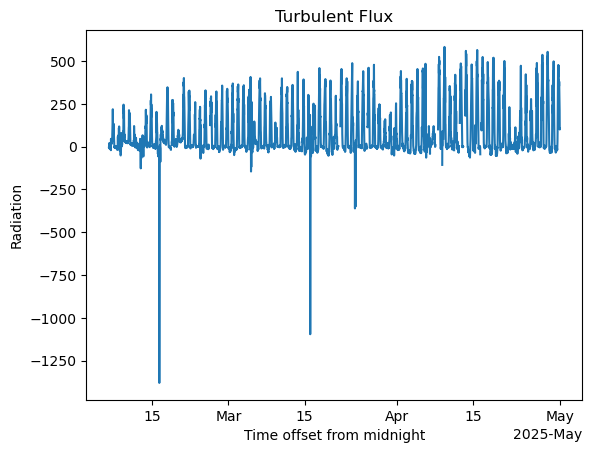

In [49]:
#net radiation calculations
turb_flux.plot()
plt.title('Turbulent Flux')
plt.ylabel('Radiation')

In [50]:
turb_flux_aligned, avail_e_aligned = xr.align(turb_flux, avail_e, join = 'inner')

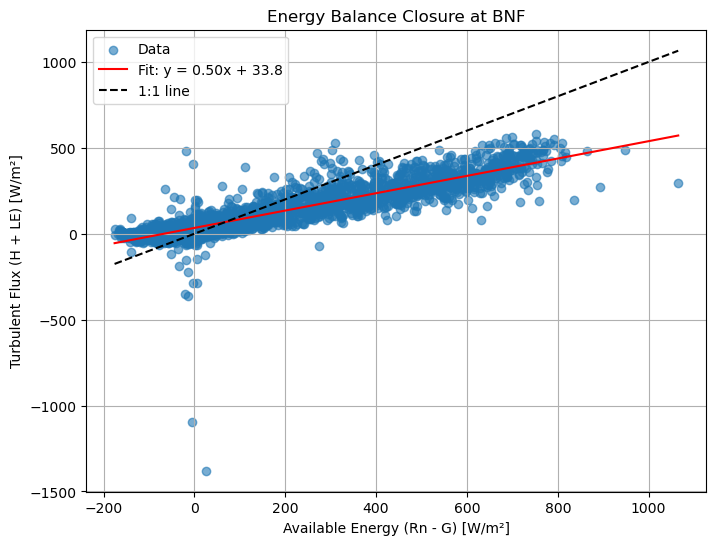

In [51]:
# Convert to numpy arrays
x = avail_e_aligned.values
y = turb_flux_aligned.values
# Remove NaNs
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
# Fit regression
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(x, y)
# Sort x for clean line plot
sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_fit = slope * x_sorted + intercept
# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x, y, alpha=0.6, label='Data')
plt.plot(x_sorted, y_fit, 'r-', label=f'Fit: y = {slope:.2f}x + {intercept:.1f}')
plt.plot([x.min(), x.max()], [x.min(), x.max()], 'k--', label='1:1 line')
plt.xlabel("Available Energy (Rn - G) [W/m²]")
plt.ylabel("Turbulent Flux (H + LE) [W/m²]")
plt.title("Energy Balance Closure at BNF")
plt.legend()
plt.grid(True)
plt.show()

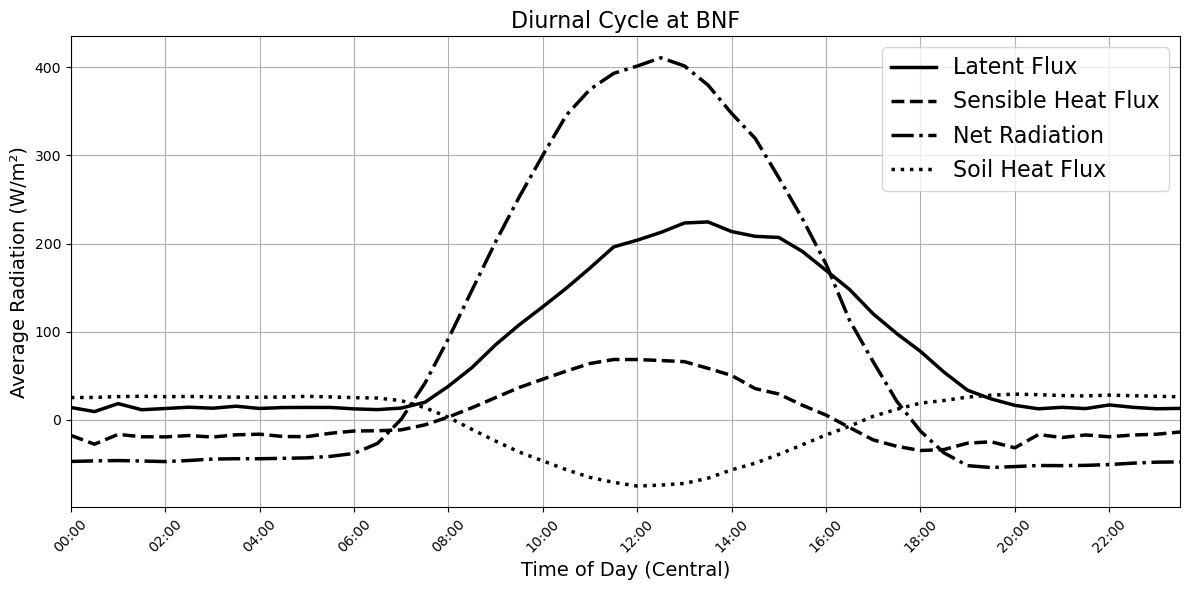

In [52]:
# --- Step 1: Timezone-aware time-of-day coordinate ---
def add_time_of_day(da):
    utc_times = pd.to_datetime(da.time.values).tz_localize('UTC')
    central_times = utc_times.tz_convert('US/Central')
    rounded = central_times.floor('30min')
    time_of_day_strs = xr.DataArray(rounded.strftime('%H:%M'), coords={'time': da.time}, dims='time')
    return da.assign_coords(time_of_day=time_of_day_strs)

# --- Step 2: Assign to each variable ---
le_td = add_time_of_day(ds_ecor['latent_flux'])
h_td  = add_time_of_day(ds_ecor['sensible_heat_flux'])
rn_td = add_time_of_day(net_radiation)
g_td  = add_time_of_day(ds_sebs['surface_soil_heat_flux_avg'])

# --- Step 3: Group by time-of-day and average ---
le_avg = le_td.groupby('time_of_day').mean('time')
h_avg  = h_td.groupby('time_of_day').mean('time')
rn_avg = rn_td.groupby('time_of_day').mean('time')
g_avg  = g_td.groupby('time_of_day').mean('time')

# --- Step 4: Sort by time ---
def sort_by_time(da):
    parsed = pd.to_datetime(da.time_of_day.values, format='%H:%M')
    sort_idx = np.argsort(parsed)
    return da.isel(time_of_day=sort_idx)

le_avg = sort_by_time(le_avg)
h_avg  = sort_by_time(h_avg)
rn_avg = sort_by_time(rn_avg)
g_avg  = sort_by_time(g_avg)

# --- Step 5: Prepare time axis ---
time_objects = pd.to_datetime(le_avg.time_of_day.values, format='%H:%M')

# --- Step 6: Plot with CUD colors and thicker lines ---
# Color-blind–friendly colors (CUD palette)
colors = {
    'LE': '#E69F00',  # orange
    'H': '#56B4E9',   # sky blue
    'Rn': '#009E73',  # bluish green
    'G': '#D55E00'    # vermillion
}

plt.figure(figsize=(12, 6))
plt.plot(time_objects, le_avg.values, label='Latent Flux', color='black', linestyle='-', linewidth=2.5)
plt.plot(time_objects, h_avg.values, label='Sensible Heat Flux', color='black', linestyle='--', linewidth=2.5)
plt.plot(time_objects, rn_avg.values, label='Net Radiation', color='black', linestyle='-.', linewidth=2.5)
plt.plot(time_objects, g_avg.values, label='Soil Heat Flux', color='black', linestyle=':', linewidth=2.5)

# Format x-axis
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
plt.xlim([time_objects[0], time_objects[-1]])

plt.xlabel("Time of Day (Central)", fontsize=14)
plt.ylabel("Average Radiation (W/m²)", fontsize=14)
plt.title("Diurnal Cycle at BNF", fontsize=16)
plt.xticks(rotation=45)
plt.legend(fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
